In [20]:
## Importar Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')


In [21]:
#Cargamos el dataset y mostramos las 5 primeras filas
base = pd.read_csv('C:/Users/User/Desktop/PRINCESA/ANALISIS DE DATOS/UNIDAD 3 - TAREA 4 - ALGORITMOS NO SUPERVISADOS/Mall_Customers.csv')
base.head(200)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 40: invalid continuation byte

In [22]:
##En tes caso fue necesario identificar la codificación del archivo ya que no detecto utf-8 para eso importamos la diguiente libreria

import chardet



In [23]:
# Despúes de importar la libreria utilizamos el siguiente código para identificar la códificación del archivo
with open(r'C:/Users/User/Desktop/PRINCESA/ANALISIS DE DATOS/UNIDAD 3 - TAREA 4 - ALGORITMOS NO SUPERVISADOS/Mall_Customers.csv', 'rb') as f:
    result = chardet.detect(f.read())
    print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [24]:
## Ahora cargamos la base recibida ordenando que nos muestre las primeras 5 filas
base = pd.read_csv(r'C:/Users/User/Desktop/PRINCESA/ANALISIS DE DATOS/UNIDAD 3 - TAREA 4 - ALGORITMOS NO SUPERVISADOS/Mall_Customers.csv', encoding='ISO-8859-1')
print(base.head())

   ID  Genero  Edad  Ingresos_anuales  Puntuación_Asignada
0   1    Male    19                15                   39
1   2    Male    21                15                   81
2   3  Female    20                16                    6
3   4  Female    23                16                   77
4   5  Female    31                17                   40


In [25]:
#Aca podemos ver cuantas filas (200) y columnas(5( tiene nuestro archivocargado
base.shape

(200, 5)

In [27]:
## Podemos hacer varios filtros, por ejemplo aca pedimos que nos muestre los datos excluyendo la edad
data=base.drop(['Edad'], axis=1)

In [28]:
## al mostrar la información vemos que la columna edad ya no esta
data.head()

,ID,Genero,Ingresos_anuales,Puntuación_Asignada
0,1,Male,15,39
1,2,Male,15,81
2,3,Female,16,6
3,4,Female,16,77
4,5,Female,17,40


In [29]:
##Vuelvo a cargar la base de forma completa para hacer un filtro diferente

base = pd.read_csv(r'C:/Users/User/Desktop/PRINCESA/ANALISIS DE DATOS/UNIDAD 3 - TAREA 4 - ALGORITMOS NO SUPERVISADOS/Mall_Customers.csv', encoding='ISO-8859-1')
print(base.head())


   ID  Genero  Edad  Ingresos_anuales  Puntuación_Asignada
0   1    Male    19                15                   39
1   2    Male    21                15                   81
2   3  Female    20                16                    6
3   4  Female    23                16                   77
4   5  Female    31                17                   40


In [71]:
##Esta vez voy a excluir el Genero
data=base.drop(['Genero'], axis=1)

In [72]:
## estos son los datos con los que voy a trabajar.
data.head()

,ID,Edad,Ingresos_anuales,Puntuación_Asignada,Grupo
0,1,19,15,39,4
1,2,21,15,81,4
2,3,20,16,6,9
3,4,23,16,77,3
4,5,31,17,40,9


In [73]:
#Este es un resumen de los datos cargados como la cantidad por 
#cada columna que son 200, la media de cada uno 
#el estandar el minimos y tambien el % hasta el maximo
data.describe()

,ID,Edad,Ingresos_anuales,Puntuación_Asignada,Grupo
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,4.705000
std,57.879185,13.969007,26.264721,25.823522,2.925881
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,2.000000
50%,100.500000,36.000000,61.500000,50.000000,5.000000
75%,150.250000,49.000000,78.000000,73.000000,7.000000
max,200.000000,70.000000,137.000000,99.000000,9.000000


In [74]:
##Con este código identificamos si hay algun valor faltante en alguna de las columnas.
data.isna().sum()

ID                     0
Edad                   0
Ingresos_anuales       0
Puntuación_Asignada    0
Grupo                  0
dtype: int64

In [75]:
#Este código nos ayuda a eliminar datos incompletos que podrían afectar el análisis.
data.dropna()

,ID,Edad,Ingresos_anuales,Puntuación_Asignada,Grupo
0,1,19,15,39,4
1,2,21,15,81,4
2,3,20,16,6,9
3,4,23,16,77,3
4,5,31,17,40,9
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,2
197,198,32,126,74,8
198,199,32,137,18,6


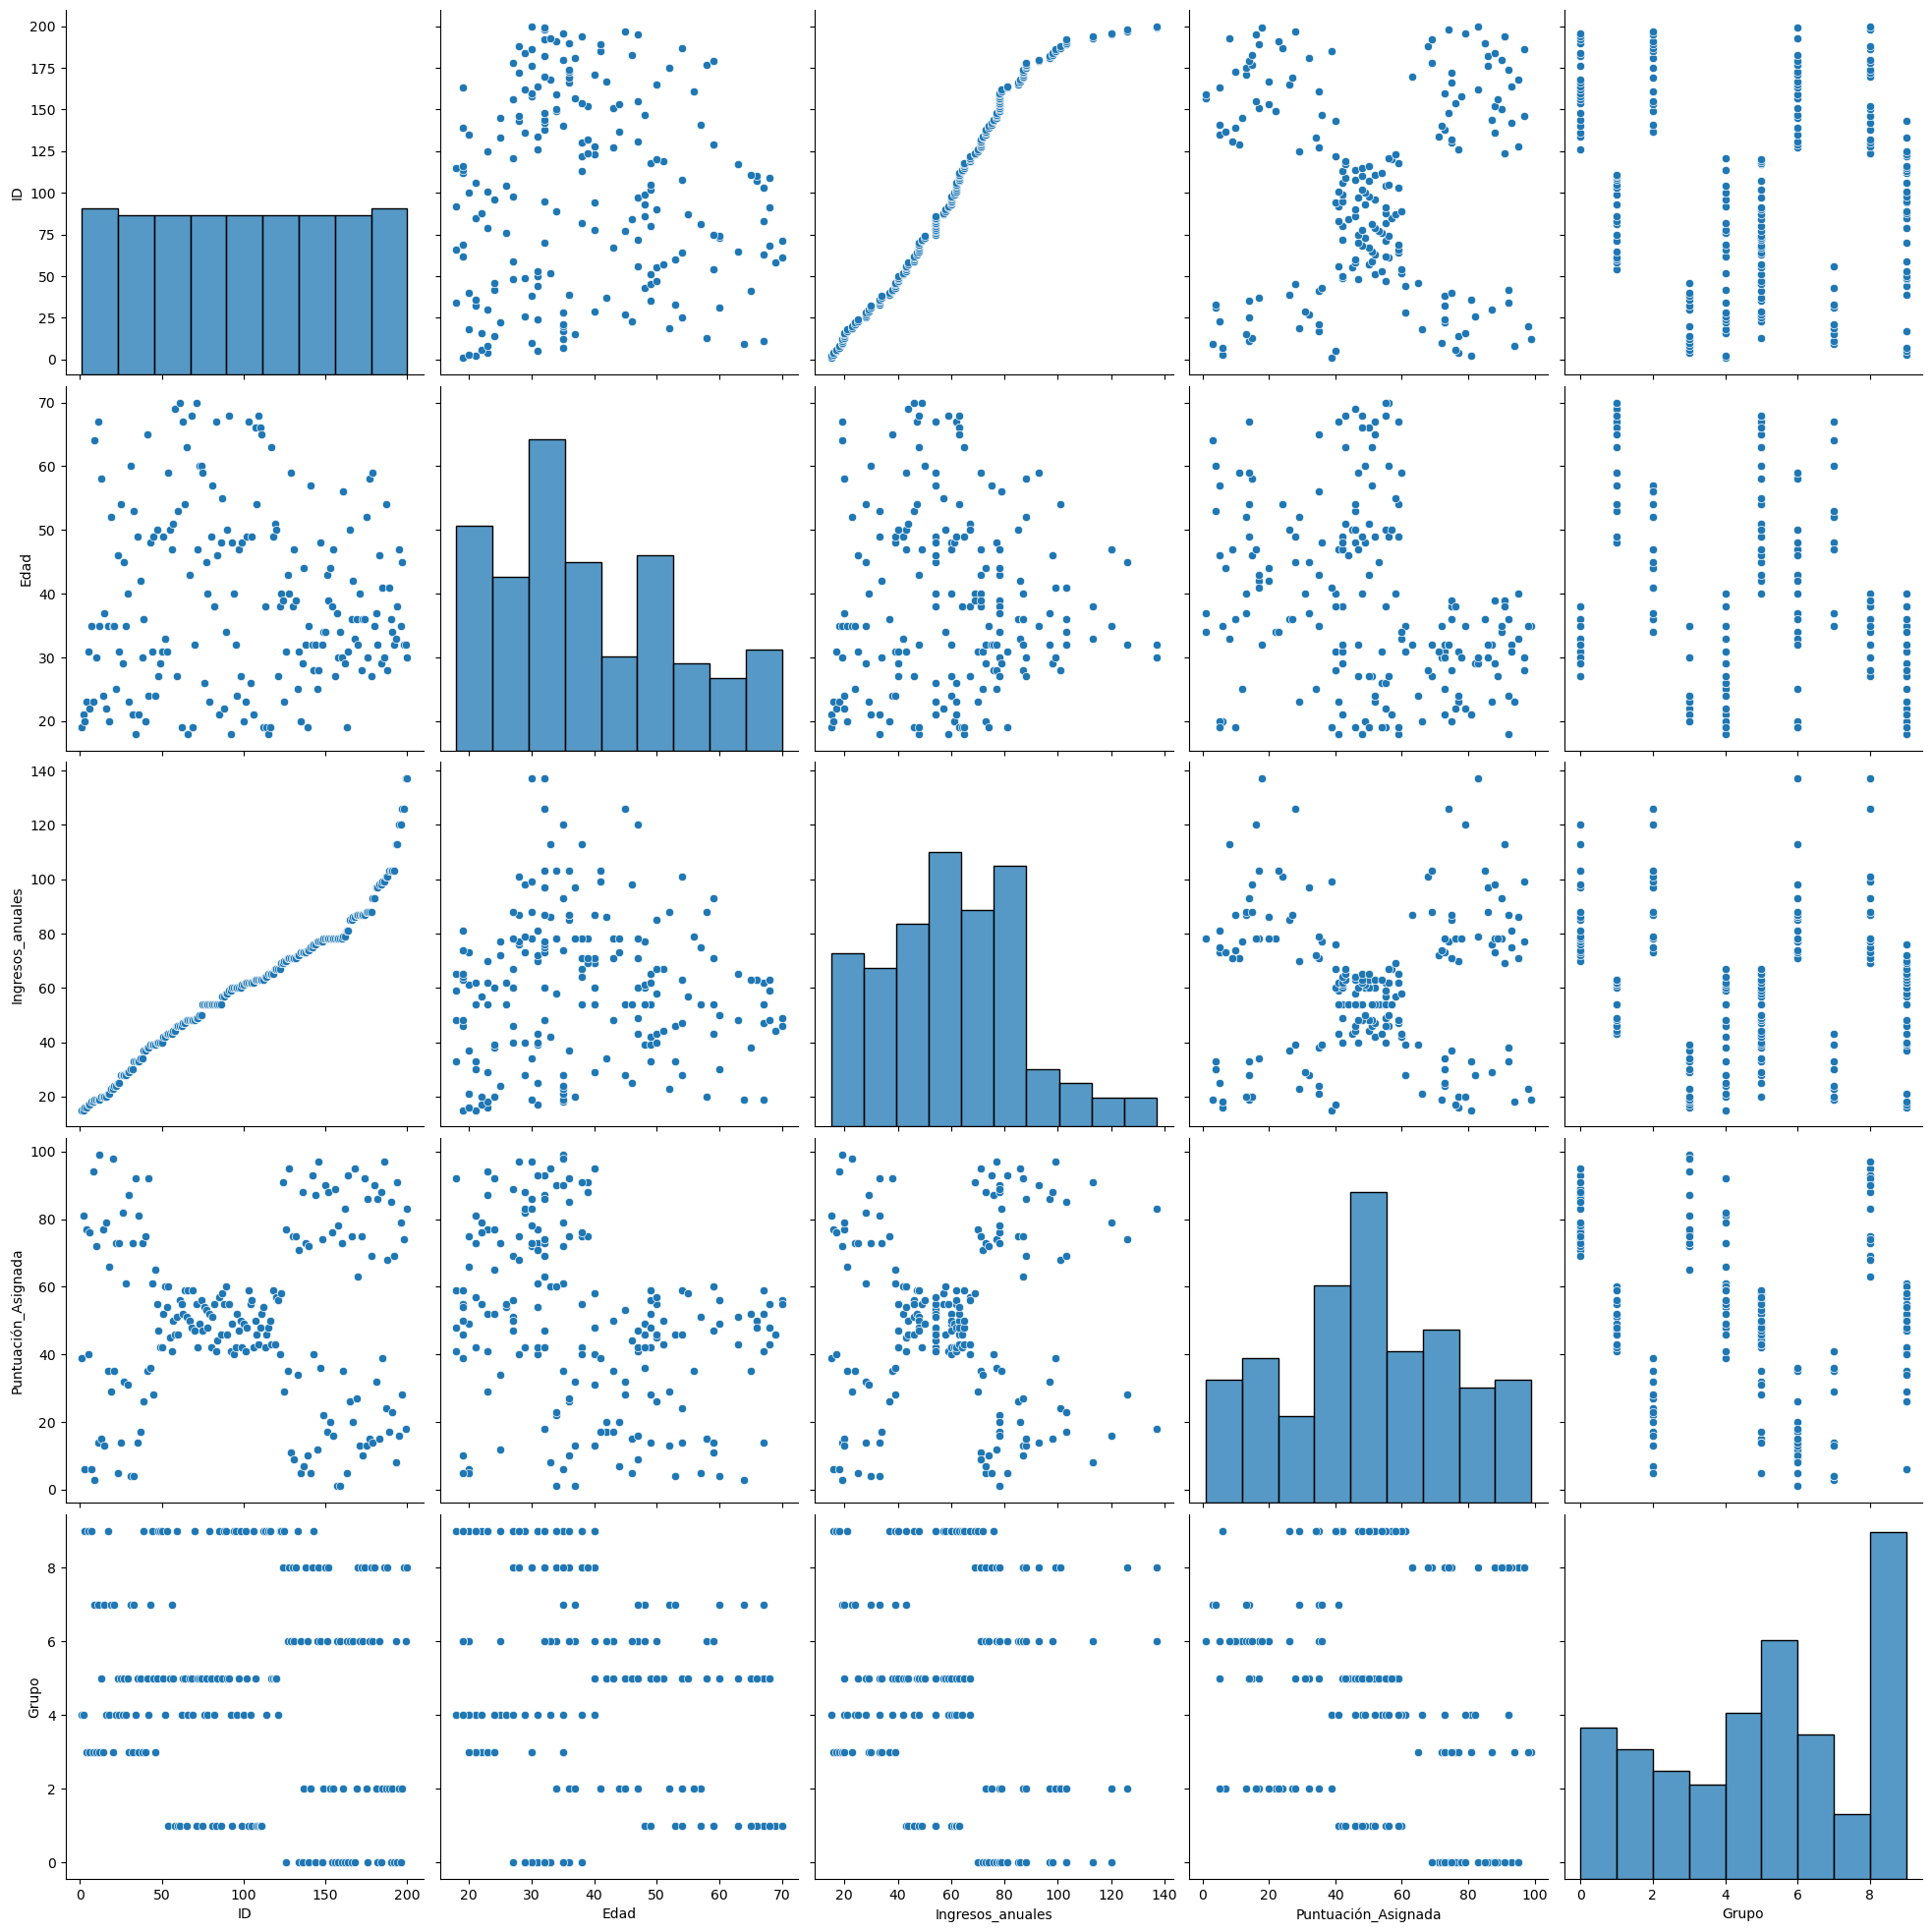

In [76]:
#e generará una matriz de gráficos de dispersión donde cada celda 
#muestra la relación entre dos variables. 
#Por ejemplo, puedes ver cómo "Edad" se relaciona con "Ingresos" y "Puntuación"
sns.pairplot(data.dropna(), size=4,kind='scatter')

In [43]:
# Cambiamos los datos determinados como string en este caso "Male" y "Female" y les asignamos un valor númerico para que puedan ser tenidos 
#en cuenta en la matriz de correlación
corr_matrix = data.select_dtypes(include=[np.number]).corr()
data['Genero'] = data['Genero'].map({'Male': 1, 'Female': 0})

In [78]:
# Matriz de correlación
corr_matrix = data.corr()
corr_matrix

,ID,Edad,Ingresos_anuales,Puntuación_Asignada,Grupo
ID,1.000000,-0.026763,0.977548,0.013835,-0.151527
Edad,-0.026763,1.000000,-0.012398,-0.327227,-0.210347
Ingresos_anuales,0.977548,-0.012398,1.000000,0.009903,-0.139149
Puntuación_Asignada,0.013835,-0.327227,0.009903,1.000000,-0.227139
Grupo,-0.151527,-0.210347,-0.139149,-0.227139,1.000000


<Axes: >

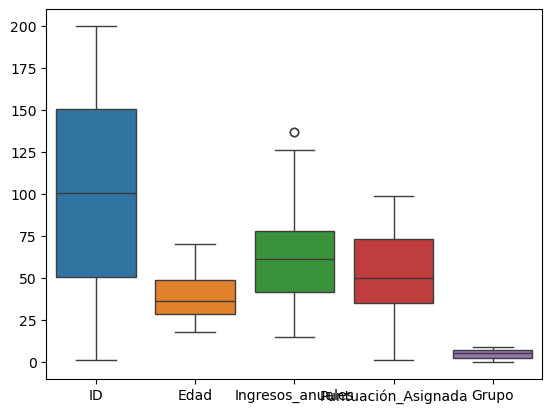

In [79]:
# Diagramas de caja para cada variable por especie
sns.boxplot(data=data)

In [80]:
# Estandarizar los datos antes de aplicar K-Means
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
X

,ID,Edad,Ingresos_anuales,Puntuación_Asignada,Grupo
0,-1.723412,-1.424569,-1.738999,-0.434801,-0.241558
1,-1.706091,-1.281035,-1.738999,1.195704,-0.241558
2,-1.688771,-1.352802,-1.700830,-1.715913,1.471618
3,-1.671450,-1.137502,-1.700830,1.040418,-0.584193
4,-1.654129,-0.563369,-1.662660,-0.395980,1.471618
...,...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061,-1.612098
196,1.671450,0.441365,2.497807,-0.861839,-0.926828
197,1.688771,-0.491602,2.497807,0.923953,1.128983
198,1.706091,-0.491602,2.917671,-1.250054,0.443712


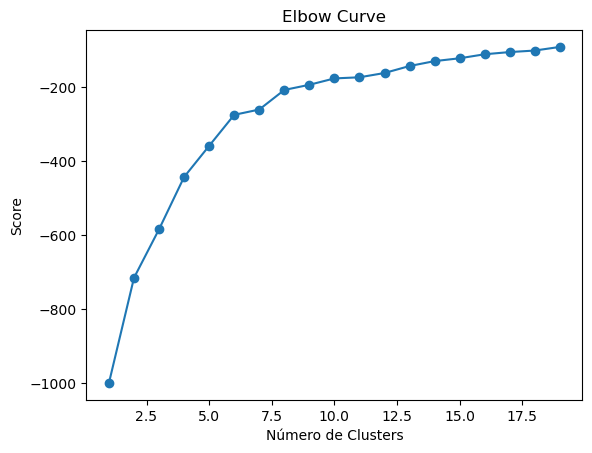

In [86]:
##KAMEANS##

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [87]:
##Segun la curva del grafico determino que el número de cluster adecuado es K= 10
kmeans = KMeans(n_clusters=8).fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[-0.35693065,  0.99755699, -0.29128727, -0.03272103,  0.10107735],
       [-1.25446952, -1.02320693, -1.23007347,  0.95270986, -0.40653017],
       [ 1.03828121, -0.39989994,  1.01344075,  1.26040667,  1.12898257],
       [-1.33905697,  0.47895722, -1.30822992, -1.19644353,  0.68845176],
       [ 1.08831886, -0.47793198,  0.97284787,  1.22158511, -1.61209803],
       [-0.26654671,  1.51786549, -0.21434255, -0.02070483, -1.26946295],
       [-0.10987835, -0.86164882, -0.09174977, -0.0914733 ,  1.09686054],
       [ 1.10728918,  0.20350983,  1.05609358, -1.27778394, -0.14366199]])

In [88]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.labels_


In [95]:
data.head()


,ID,Edad,Ingresos_anuales,Puntuación_Asignada,Grupo
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,3
3,4,23,16,77,1
4,5,31,17,40,3


In [98]:
#Filtramos la base dejando valores númericos
base=base[["Edad" , "Ingresos_anuales" , "Puntuación_Asignada","Grupo"]]

In [99]:
#Base filtrada
data.head(10)

,ID,Edad,Ingresos_anuales,Puntuación_Asignada,Grupo
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,3
3,4,23,16,77,1
4,5,31,17,40,3
5,6,22,17,76,1
6,7,35,18,6,3
7,8,23,18,94,1
8,9,64,19,3,3
9,10,30,19,72,1


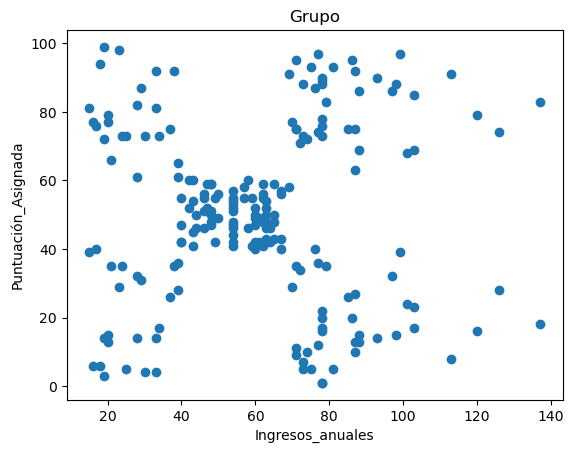

In [100]:
# Modelo sin agrupación
plt.scatter(base['Ingresos_anuales'], base['Puntuación_Asignada'])
plt.xlabel('Ingresos_anuales')
plt.ylabel('Puntuación_Asignada')
plt.title('Grupo')
plt.show()

In [102]:
#Modelo de agrupamiento K=8 ( 8 GRUPOS)
modelo = KMeans(n_clusters=8, random_state=0)
modelo.fit(base)

KMeans(random_state=0)

In [103]:
#Agregar columna del grupo a la base para identificar el número de grupo del agrupamiento
modelo.labels_
base["Grupo"]=modelo.labels_
print(base)

     Edad  Ingresos_anuales  Puntuación_Asignada  Grupo
0      19                15                   39      4
1      21                15                   81      6
2      20                16                    6      4
3      23                16                   77      6
4      31                17                   40      4
..    ...               ...                  ...    ...
195    35               120                   79      2
196    45               126                   28      5
197    32               126                   74      2
198    32               137                   18      5
199    30               137                   83      2

[200 rows x 4 columns]


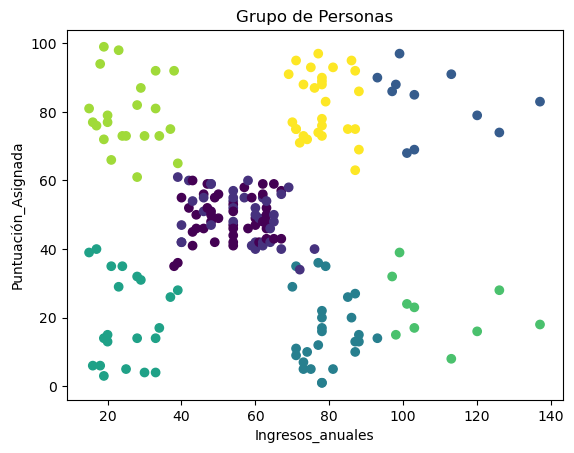

In [107]:
#Agrupación Kmeans = 8 clusters
plt.scatter(base['Ingresos_anuales'], base['Puntuación_Asignada'], c = base['Grupo'], cmap='viridis')
plt.xlabel('Ingresos_anuales')
plt.ylabel('Puntuación_Asignada')
plt.title('Grupo de Personas')
plt.show()

In [108]:
# Calcular medidas de calidad para K-Means
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.4112473271030281
Índice de Calinski-Harabasz: 108.31330111859556
Inertia (suma de cuadrados dentro de los clusters): 202.0641892872125
Davies-Bouldin Index: 0.8792996608683955


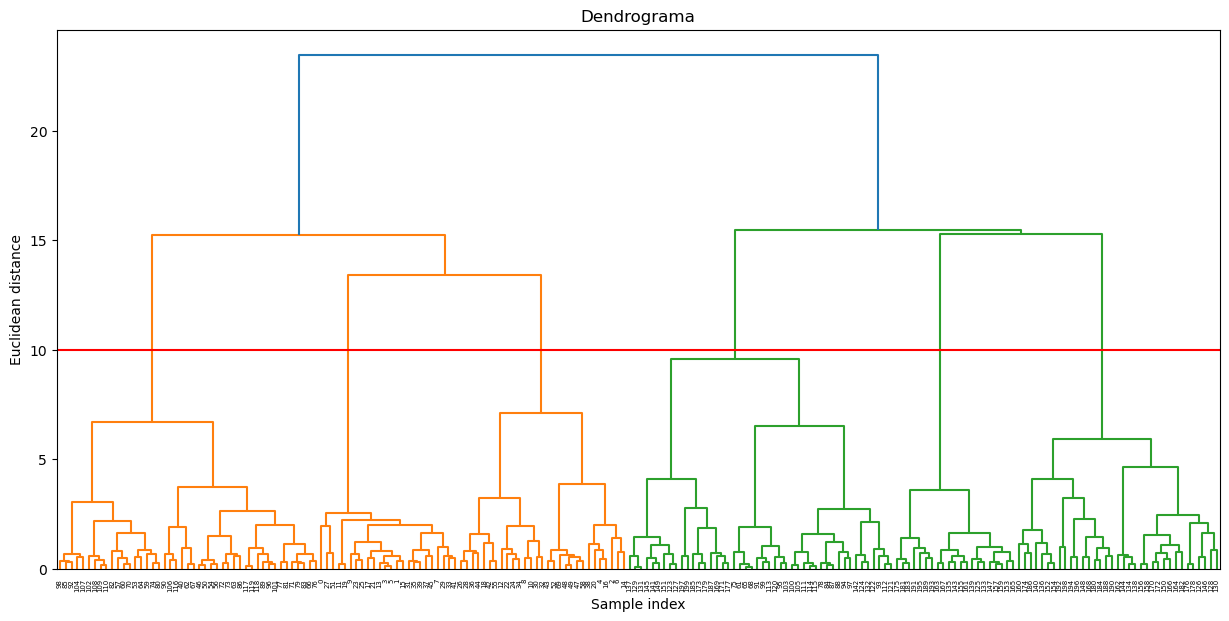

In [110]:
## Hierarchical clustering ##

ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(15, 7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [111]:
##Determinamos los array
hier_clustering = AgglomerativeClustering(n_clusters=3)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2], dtype=int64)

In [112]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

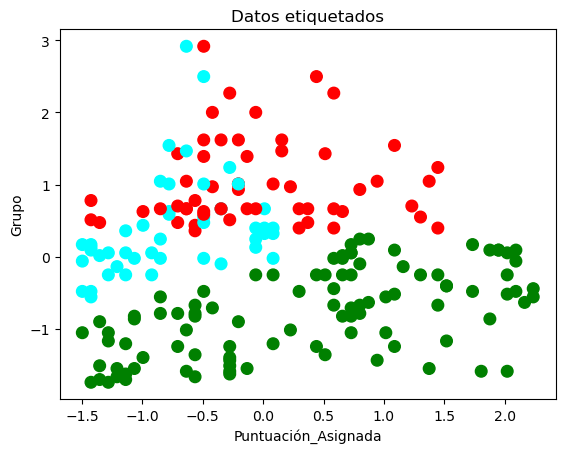

In [115]:
f1 = X['Edad'].values
f2 = X['Ingresos_anuales'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Puntuación_Asignada')
plt.ylabel('Grupo')
plt.show()

In [119]:
from sklearn.cluster import AgglomerativeClustering

In [122]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [124]:
import sklearn
print(sklearn.__version__)


1.5.1


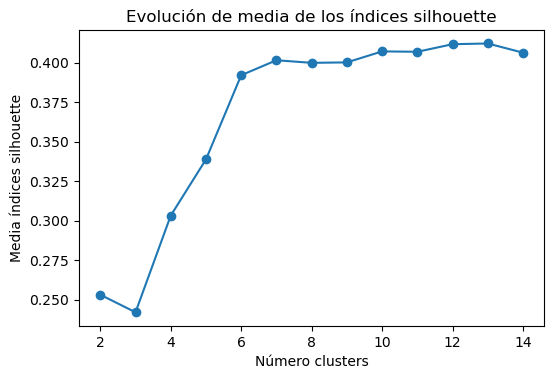

In [126]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================

range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    metric   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [127]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.24204236872508797
Índice de Calinski-Harabasz: 64.08422281469723
Davies-Bouldin Index: 1.410538402550262


In [128]:
hier_clustering = AgglomerativeClustering(n_clusters=2)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [129]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.25316018125717527
Índice de Calinski-Harabasz: 75.02329547786469
Davies-Bouldin Index: 1.5629710191795587


In [130]:
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
# Compute the distances
X_dist = pdist(X)
# Compute the linkage matrix
Z = linkage(X, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.6112296290193415, array([ 2.55379763, 13.41913335,  2.55379763, ..., 15.45140764,
        0.56583001, 15.45140764]))
